In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [144]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "EXVO"
fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

df = pd.read_csv(fname)

In [145]:
df.head(10)

,difficulty,height,nonce,time
0,897.672928,45594.0,5.852334e+08,1.525517e+09
1,852.832284,45593.0,2.167449e+09,1.525517e+09
2,784.303377,45592.0,6.114254e+08,1.525516e+09
3,723.582569,45591.0,1.644229e+09,1.525516e+09
4,673.742314,45590.0,1.195440e+09,1.525516e+09
5,606.498103,45589.0,2.238709e+09,1.525516e+09
6,692.120931,45588.0,1.983063e+08,1.525516e+09
7,266.660733,45587.0,1.910481e+09,1.525516e+09
8,281.927808,45586.0,6.578264e+08,1.525516e+09
9,290.324121,45585.0,3.806202e+09,1.525516e+09


In [97]:
df.groupby('flags')['flags'].count()

flags
proof-of-stake                   488
proof-of-stake stake-modifier    185
proof-of-work                    314
proof-of-work stake-modifier     136
Name: flags, dtype: int64

In [129]:
df_pow = df[df['flags']=='proof-of-work'][['difficulty','flags','height','time']]

In [130]:
df_pow['date'] = pd.to_datetime(df_pow['time'],unit='s')

In [131]:
df_pow.head(5)

,difficulty,flags,height,time,date
4,12525.669490,proof-of-work,146667.0,1.525494e+09,2018-05-05 04:18:59
9,8628.788386,proof-of-work,146662.0,1.525494e+09,2018-05-05 04:15:13
12,8602.138987,proof-of-work,146659.0,1.525494e+09,2018-05-05 04:13:52
17,4595.817507,proof-of-work,146654.0,1.525494e+09,2018-05-05 04:12:05
22,4785.331215,proof-of-work,146649.0,1.525493e+09,2018-05-05 04:08:00


Text(0,0.5,'Diff')

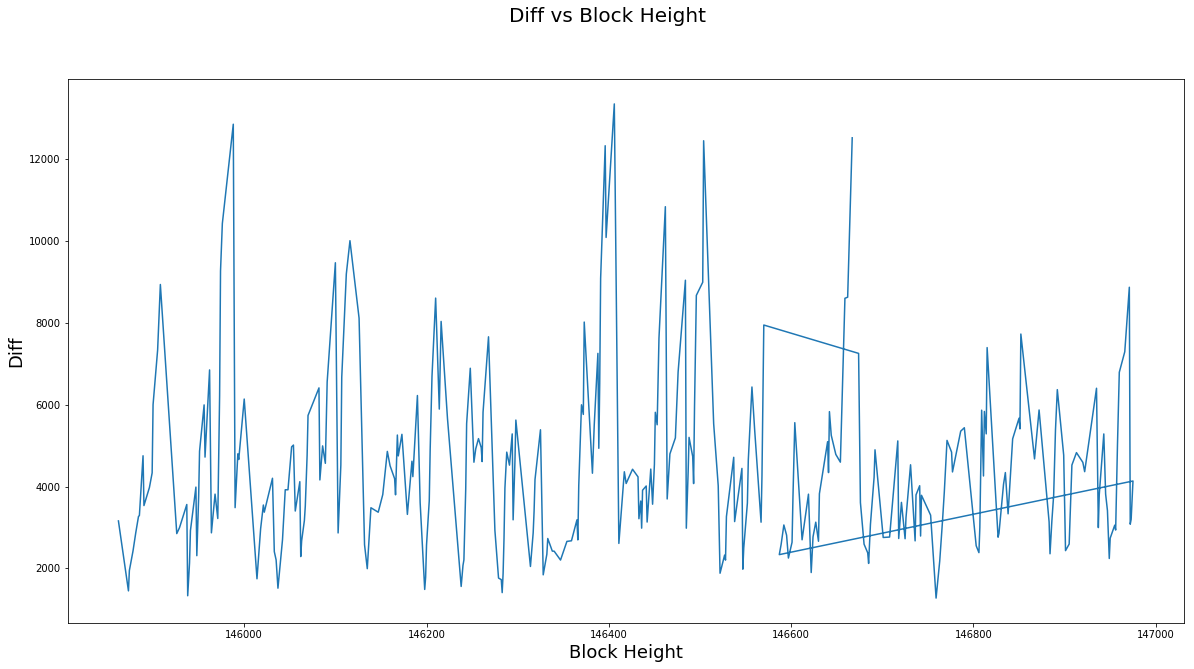

In [132]:
fig = plt.figure(figsize=(20,10))
x_axis = df_pow['height']
y_axis = df_pow['difficulty']
plt.plot(x_axis, y_axis)
fig.suptitle('Diff vs Block Height', fontsize=20)
plt.xlabel('Block Height', fontsize=18)
plt.ylabel('Diff', fontsize=18)

In [133]:
a = df_pow[['height','time']]

In [134]:
a['index']=a['height']

c:\users\kai\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
a.head(3)

,height,time,index
4,146667.0,1.525494e+09,146667.0
9,146662.0,1.525494e+09,146662.0
12,146659.0,1.525494e+09,146659.0


In [138]:
b = a.set_index('index').diff(-100).dropna()

In [139]:
b.head(3)

,height,time
index,,
146667.0,-24.0,-1093.0
146662.0,-25.0,-1253.0
146659.0,-26.0,-1239.0


In [140]:
b['block_per_day']=b['height']/b['time']*3600*24

In [141]:
b['block_per_day']

index
146667.0    1897.163769
146662.0    1723.862729
146659.0    1813.075061
146654.0    1934.328358
146649.0    1832.010944
146644.0    1720.472931
146642.0    1750.981634
146641.0    2008.644401
146640.0    1965.497630
146631.0    1880.176811
146630.0    1913.318570
146627.0    1856.353591
146624.0    1924.215809
146622.0    1923.664122
146619.0    1947.428571
146612.0    1916.723549
146604.0    1983.062920
146602.0    1916.672444
146601.0    1910.711818
146597.0    1965.607226
146595.0    2012.795549
146592.0    2063.947078
146589.0    2045.512367
146587.0    2067.428571
146975.0    1953.502089
146973.0    1920.090978
146972.0    1926.023100
146971.0    1939.141939
146966.0    1981.959565
146960.0    1982.352363
               ...     
146314.0    2030.642730
146298.0    2045.777427
146297.0    2049.376736
146295.0    2052.154066
146294.0    2010.967608
146291.0    2035.872547
146288.0    2032.018982
146286.0    2035.935199
146285.0    2038.991597
146284.0    2035.570470
146283.0  